In [15]:
#import packages
import csv
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.pipeline import Pipeline

In [16]:
#import data

df = pd.read_csv(r'ML_DATA.csv' , sep = ',')

df = df.iloc[:,1:]

df.head()

,value,rest_price_cat,rest_no_review,rest_rating_aggr,area_Frederiksberg,area_Frederiksberg C,area_Hellerup,area_Kastrup,area_København K,area_København N,...,month_09,month_10,month_11,month_12,rest_rating_1,rest_rating_2,rest_rating_3,rest_rating_4,rest_rating_5,rating_cat
0,7.143611,2.5,48.0,4.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,5
1,2.414839,2.5,48.0,4.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
2,2.414839,2.5,48.0,4.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
3,4.801204,2.5,48.0,4.5,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,5
4,4.892359,2.5,48.0,4.5,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,5


In [17]:
df.columns

Index(['value', 'rest_price_cat', 'rest_no_review', 'rest_rating_aggr',
       'area_Frederiksberg', 'area_Frederiksberg C', 'area_Hellerup',
       'area_Kastrup', 'area_København K', 'area_København N',
       'area_København NV', 'area_København S', 'area_København SV',
       'area_København V', 'area_København Ø', 'area_Nordhavn', 'area_Søborg',
       'area_Valby', 'area_Vanløse', 'rest2_Amerikansk', 'rest2_Asiatisk',
       'rest2_Bar', 'rest2_Café', 'rest2_Europæisk', 'rest2_Fastfood',
       'rest2_Fisk og skaldyr', 'rest2_Fransk', 'rest2_Indisk',
       'rest2_International', 'rest2_Italiensk', 'rest2_Japansk',
       'rest2_Kinesisk', 'rest2_Latinamerikansk', 'rest2_Mellemøstlig',
       'rest2_Middelhavsområdet', 'rest2_Moderne', 'rest2_Skandinavisk',
       'rest2_Steakhouse', 'month_02', 'month_03', 'month_04', 'month_05',
       'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11',
       'month_12', 'rest_rating_1', 'rest_rating_2', 'rest_rating_3',
  

**THIS IS DECISION TREE**
kilde: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [54]:
#split dataset in features and target variable
#target = y
#feature = x
target = ['rest_rating_1', 'rest_rating_2', 'rest_rating_3',
       'rest_rating_4', 'rest_rating_5']
target1 = ['rating_cat']       

feature = ['value', 'rest_price_cat', 'rest_no_review', 'rest_rating_aggr',
       'area_Frederiksberg', 'area_Frederiksberg C', 'area_Hellerup',
       'area_Kastrup', 'area_København K', 'area_København N',
       'area_København NV', 'area_København S', 'area_København SV',
       'area_København V', 'area_København Ø', 'area_Nordhavn', 'area_Søborg',
       'area_Valby', 'area_Vanløse', 'rest2_Amerikansk', 'rest2_Asiatisk',
       'rest2_Bar', 'rest2_Café', 'rest2_Europæisk', 'rest2_Fastfood',
       'rest2_Fisk og skaldyr', 'rest2_Fransk', 'rest2_Indisk',
       'rest2_International', 'rest2_Italiensk', 'rest2_Japansk',
       'rest2_Kinesisk', 'rest2_Latinamerikansk', 'rest2_Mellemøstlig',
       'rest2_Middelhavsområdet', 'rest2_Moderne', 'rest2_Skandinavisk',
       'rest2_Steakhouse', 'month_02', 'month_03', 'month_04', 'month_05',
       'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11',
       'month_12']      

X = np.array(df[feature]) # Features
#y = df[target1] # Target variable
y = np.array(df[target1]) # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [58]:
#BUILD THE DECISION MODEL
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
#amx_depth=10
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dec_tree_1 = metrics.accuracy_score(y_test, y_pred)

#Accuracy: 0.41421217428222684

Accuracy: 0.41474287533832194


In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 108,   95,  129,  227,  238],
       [  84,  123,  178,  364,  327],
       [ 143,  174,  313,  804,  743],
       [ 277,  371,  737, 2116, 2453],
       [ 303,  359,  685, 2337, 5155]], dtype=int64)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

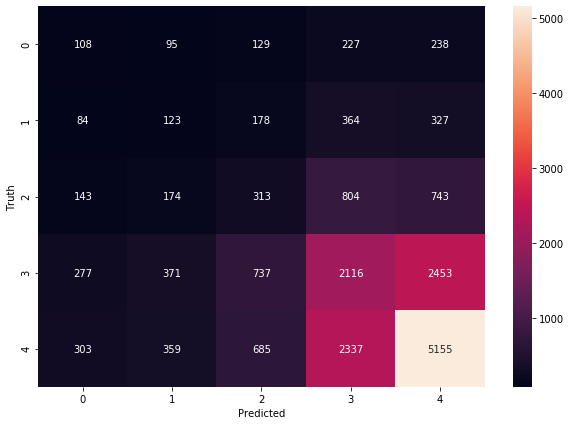

In [60]:
#the confusion matrix

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='.20g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.savefig('cmtarget1.png')
plt.savefig('dec_tree_1.png')
plt.figure

In [61]:
#OPTIMIZING
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=40)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dec_tree_2 = metrics.accuracy_score(y_test, y_pred)

#max_depth = 50: Accuracy: 0.3337578941782094
#max_depth = 40: Accuracy: 0.3338640343894284
#max_depth = 10: Accuracy: 0.2516053706946877
#NYT: max_depth = 50: Accuracy: 
#NYT: max_depth = 40: Accuracy: 0.4135753330149127
#NYT: max_depth = 10: Accuracy: 

Accuracy: 0.41283235153637954


In [62]:
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[ 120,   92,  118,  231,  236],
       [  92,  127,  171,  359,  327],
       [ 149,  186,  313,  817,  712],
       [ 276,  400,  743, 2085, 2450],
       [ 302,  365,  707, 2331, 5134]], dtype=int64)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

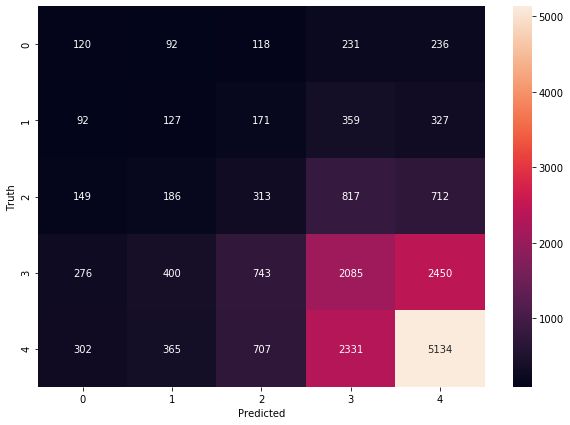

In [63]:
#the plot

plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='.20g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.savefig('cmtarget1.png')
plt.savefig('dec_tree_2.png')
plt.figure

**Gridsearch on decisiontree**

In [64]:
params_dec={#'n_estimators': [10,30,50,70,90,100],
        'criterion' : ('gini','entropy'),
        'max_depth': (4,8,12,16,20), 
        'max_features' : ('auto', 'sqrt'),
        'min_samples_split': (2,4,6)
        #,'min_samples_leaf': [3,5], 'rf_class_weight': [{0:1, 1:1}, {0: 1, 1:5}, {0: 1, 1:3}, 'balanced']
       }

In [66]:
dt_gs = GridSearchCV(DecisionTreeClassifier(), param_grid = params_dec, cv = 5, verbose = True)

In [67]:
dec_gs = dt_gs.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.9s finished


In [68]:
dec_gs

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (4, 8, 12, 16, 20),
                   

In [71]:
dec_gs_best = dec_gs.best_estimator_
dec_gs_best

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
dec_gs_best_score = dec_gs.best_score_
dec_gs_best_score

0.48666542829848214

In [73]:
dec_gs_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
dec_gs_model_fit = dec_gs_model.fit(X_train, y_train.ravel())
dec_gs_model_fit

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
y_pred = dec_gs_model.predict(X_test)

In [76]:
print(f'Test : {dec_gs_model.score(X_test, y_test):.3f}')
print(f'Train : {dec_gs_model.score(X_train, y_train):.3f}')

Test : 0.485
Train : 0.487


In [77]:
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[   0,    0,    0,  319,  478],
       [   0,    0,    0,  391,  685],
       [   0,    0,    0,  689, 1488],
       [   0,    0,    0, 1137, 4817],
       [   0,    0,    0,  844, 7995]], dtype=int64)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

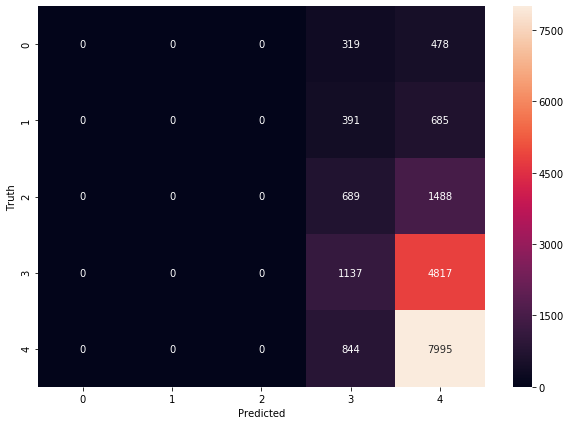

In [78]:
#the plot

plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True, fmt='.20g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.savefig('cmtarget1.png')
plt.savefig('dec_gs_model.png')
plt.figure

**THIS IS RANDOM FOREST**

In [84]:
#Import Random Forest Model


timer = 0
start = time.time()
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train.ravel())

y2_pred=clf2.predict(X_test)

end = time.time()
timer = timer + end - start
timer_accu = str(round(timer/60, 1))
print("Completed in " + timer_accu + " minutes." )

Completed in 0.1 minutes.


In [85]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y2_pred))

rf_1 = metrics.accuracy_score(y_test, y2_pred)

#n_estimator = 100: Accuracy: 0.44929151409011303
#n_estimator = 500: Accuracy: 0.44987528525181764
#n_estimator = 50: Accuracy: 0.44939765430133205

Accuracy: 0.4428169612057528


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

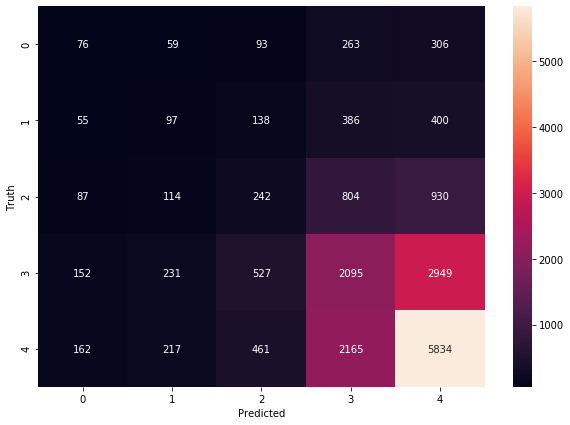

In [87]:
# Conf matrix

cm3 = confusion_matrix(y_test, y2_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True, fmt='.20g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.savefig('cmtarget1.png')
plt.savefig('rf_model1.png')
plt.figure

#PRØVER NY METODE

In [88]:
# Manual optimize of parameters.


timer = 0
start = time.time()
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=50, max_depth = 10, criterion = 'gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train.ravel())

y2_pred=clf2.predict(X_test)

end = time.time()
timer = timer + end - start
timer_accu = str(round(timer/60, 1))
print("Completed in " + timer_accu + " minutes." )

Completed in 0.1 minutes.


In [89]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y2_pred))

rf_2 = metrics.accuracy_score(y_test, y2_pred)

#n_estimator = 100: Accuracy: 0.44929151409011303
#n_estimator = 500: Accuracy: 0.44987528525181764
#n_estimator = 50: Accuracy: 0.44939765430133205

Accuracy: 0.4902085655150454


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

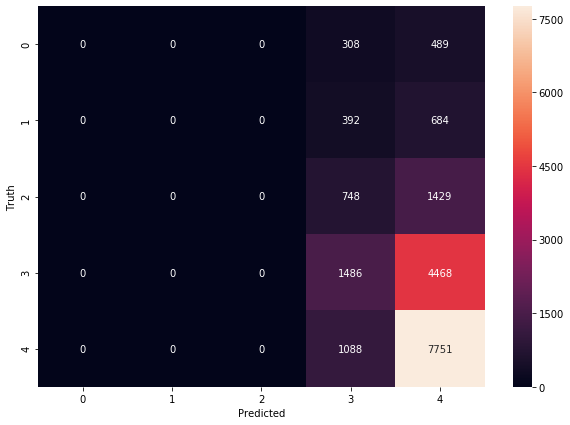

In [90]:
# Conf matrix

cm3 = confusion_matrix(y_test, y2_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True, fmt='.20g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.savefig('cmtarget1.png')
plt.savefig('rf_model2.png')
plt.figure

**Gridsearch time!!!**

In [91]:
params_rf={'n_estimators': [10,30,50,70,90,100],
        'criterion' : ('gini','entropy'),
        'max_depth': (4,8,12,16,20), 
        'max_features' : ('auto', 'sqrt'),
        'min_samples_split': (2,4,6)
        #,'min_samples_leaf': [3,5], 'rf_class_weight': [{0:1, 1:1}, {0: 1, 1:5}, {0: 1, 1:3}, 'balanced']
       }

In [92]:
RF_gs = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = params_rf, cv = 5, verbose = True)

In [93]:
RF_gs_fit = RF_gs.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 43.3min finished


In [94]:
RF_gs_fit

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [95]:
RF_gs_best = RF_gs_fit.best_estimator_
RF_gs_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [96]:
RF_gs_fit.best_score_

0.4939098821781127

In [97]:
RF_Model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [98]:
RF_Model_fit = RF_Model.fit(X_train, y_train.ravel())

In [100]:
y_pred_RF = RF_Model.predict(X_test)

In [101]:
print(f'Test : {RF_Model.score(X_test, y_test):.3f}')
print(f'Train : {RF_Model.score(X_train, y_train):.3f}')

Test : 0.493
Train : 0.522


In [102]:
cm4 = confusion_matrix(y_test, y_pred_RF)
cm4

array([[   1,    1,    0,  387,  408],
       [   0,    0,    0,  479,  597],
       [   0,    0,    2,  938, 1237],
       [   0,    0,    0, 1857, 4097],
       [   0,    0,    0, 1406, 7433]], dtype=int64)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

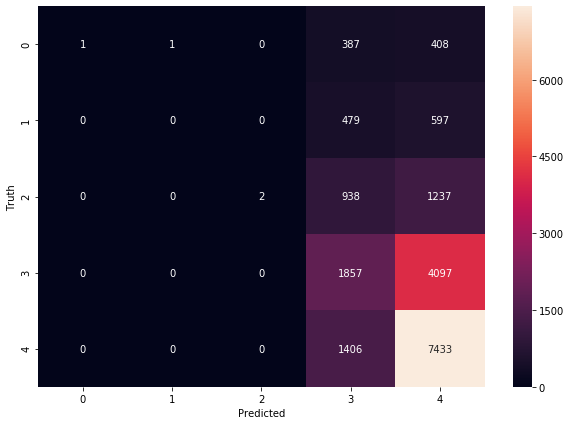

In [103]:
#the plot

plt.figure(figsize=(10,7))
sns.heatmap(cm4, annot=True, fmt='.20g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.savefig('cmtarget1.png')
plt.savefig('RF_Model.png')
plt.figure

In [105]:
from sklearn.tree import export_graphviz

In [135]:
estimator = RF_Model_fit[5]

export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = feature,
                max_depth = 2,
                #class_names = target1,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [142]:
print(feature[7])
print(feature[13], feature[24])
print(feature[1], feature[23], feature[0], feature[44])

area_Kastrup
area_København V rest2_Fastfood
rest_price_cat rest2_Europæisk value month_08
